# 🪩 주제분석
# 1. Risk Factors for Cardiovascular Heart Disease
- 심장질환에 미치는 위험요소


## 🪩 실제 데이터 분석 순서

1) 전처리(결측치, 중복값)
2) 탐색(시각화)
3) 전처리(이상치)
4) 데이터 세트 분리
5) 교차 검증
6) 과적합 그래프 확인
7) 정확도 확인
8) 오차행렬 (평가지표) 확인
9) 임계치 확인
10) ROC Curve 그래프 확인
11) 정밀도, 재현율 확인
12) 임계치 수정
13) 오차행렬 (평가지표) 확인
14) ROC Curve 그래프 확인
15) 결론

### 🪩 이론 데이터 분석 순서
- 이진 분류 데이터 세트 찾기
- 탐색(시각화)
- 전처리(비중): 10% 가 넘으면 대체
- 데이터 세트 분리(stratify=True)
- GridSearchCV(DTC) : 교차검증
- fit: graphviz
- predict (정확도)
- 오차행렬
- proba
- 정밀도, 재현율 수립
- cuv -> thresholds
- 조정


#### 컬럼 확인
- index: index
- id : id
- age : 나이
- gender : 성별
- height : 키
- weight :몸무게
- ap_hi : 수축기 혈압  
  (성인의 일반적인 정상 수축기 혈압: 90~120 mmHg)
- ap_lo : 이완기 혈압  
  (성인의 일반적인 정상 이완기 혈압: 60~80 mmHg)
- cholesterol : 콜레스테롤 (1: 정상, 2: 조금 높음, 3: 아주 높음)
- gluc : 혈당 (1: 정상, 2: 조금 높음, 3: 아주 높음)
- smoke : 흡연여부
- alco : 음주여부
- active : 주당 운동량 
- cardio: 심장질환 (target)

##### 🚩정리

1. 여러 개의 임계값에 대한 정밀도와 재현율을 확인한다.
> precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)

2. 위의 임계값에 대한 다양한 평가 지표를 확인한다.
> get_evaluation_by_thresholds(y_test, proba_class1.reshape(-1, 1), thresholds)

3. 원하는 임계값으로 설정하여 다시 한 번 다양한 평가 지표를 확인한다.
> custom_proba = dtc.proba(X_test)[:, 1].reshape(-1, 1)
> prediction = Binarizer(threshold=0.52).fit_transform(custom_proba)
> get_evaluation(y_test, prediction, dtc, X_test)

4. 해당 임계값으로 설정된 모델의 prediction을 사용한다.

In [1]:
import pandas as pd

path = './datasets/heart_data.csv'
h_df = pd.read_csv(path)
h_df

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [2]:
h_need_df = h_df.copy()
h_need_df.columns

Index(['index', 'id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [3]:
# 데이터 전처리 작업
# 1. id 중복값 확인 후 삭제
# 2. age의 경우 태어난 일자를 뜻하며 현재 기준으로 살아온 날짜로 변경, 컬럼 변경 필요 없음

In [4]:
h_need_df = h_need_df.drop(labels = ['id'], axis =1).reset_index(drop=True)
h_need_df.rename(columns = {'index':'No'}, inplace =True)
h_need_df

,No,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [5]:
h_need_df['age'].max() # 23713
h_need_df['age'].min() # 10798
h_need_df['age'] = h_need_df['age'].apply(lambda x: x // 365)
h_need_df

,No,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,61,1,163,72.0,135,80,1,2,0,0,0,1


<Figure size 1200x1000 with 0 Axes>

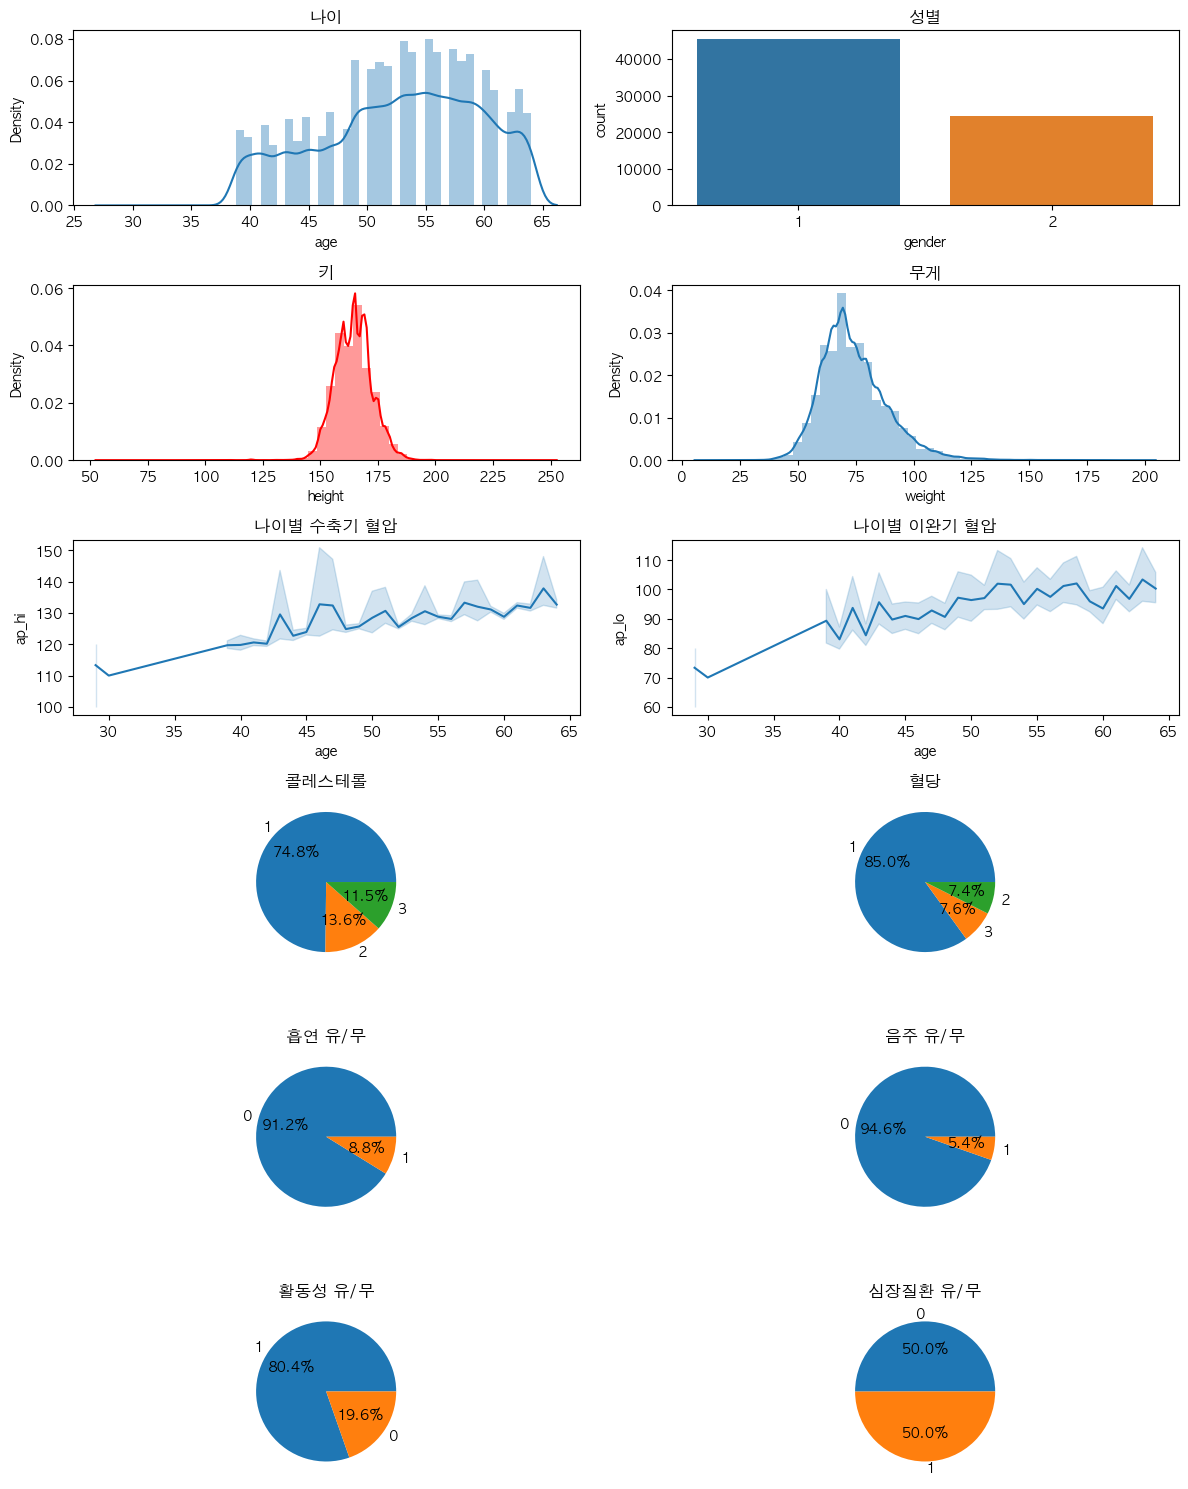

In [6]:
# 데이터 탐색 (각 컬럼에 대하여 특이사항이 육안으로 보이는 지 시각화)
# 시각화를 통한 데이터 탐색
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(12, 10))
fig, axes = plt.subplots(6, 2, figsize=(12, 15))

sns.distplot(h_need_df['age'], kde=True,ax=axes[0,0])
axes[0,0].set_title('나이')

sns.countplot(x='gender', data=h_need_df, ax=axes[0,1])
axes[0,1].set_title('성별')

sns.distplot(h_need_df['height'], kde=True,ax=axes[1,0], color='red')
axes[1,0].set_title('키')

sns.distplot(h_need_df['weight'], kde=True,ax=axes[1,1])
axes[1,1].set_title('무게')

sns.lineplot(x='age', y='ap_hi', data=h_need_df, ax=axes[2, 0])
axes[2,0].set_title('나이별 수축기 혈압')

sns.lineplot(x='age', y='ap_lo', data=h_need_df, ax=axes[2, 1])
axes[2,1].set_title('나이별 이완기 혈압')

# 콜레스테롤 파이 차트
cholesterol_counts = h_need_df['cholesterol'].value_counts()
axes[3, 0].pie(cholesterol_counts, labels=cholesterol_counts.index, autopct='%1.1f%%')
axes[3, 0].set_title('콜레스테롤')

# 혈당 파이 차트
gluc_counts = h_need_df['gluc'].value_counts()
axes[3, 1].pie(gluc_counts, labels=gluc_counts.index, autopct='%1.1f%%')
axes[3, 1].set_title('혈당')

# 흡연 여부 파이 차트
smoke_counts = h_need_df['smoke'].value_counts()
axes[4, 0].pie(smoke_counts, labels=smoke_counts.index, autopct='%1.1f%%')
axes[4, 0].set_title('흡연 유/무')

# 음주 여부 파이 차트
alco_counts = h_need_df['alco'].value_counts()
axes[4, 1].pie(alco_counts, labels=alco_counts.index, autopct='%1.1f%%')
axes[4, 1].set_title('음주 유/무')

# 활동성 여부 파이 차트
active_counts = h_need_df['active'].value_counts()
axes[5, 0].pie(active_counts, labels=active_counts.index, autopct='%1.1f%%')
axes[5, 0].set_title('활동성 유/무')

# 심장질환 여부 파이 차트
cardio_counts = h_need_df['cardio'].value_counts()
axes[5, 1].pie(cardio_counts, labels=cardio_counts.index, autopct='%1.1f%%')
axes[5, 1].set_title('심장질환 유/무')

plt.tight_layout()
plt.show()

# 시각화 그래프를확인 했을 떄 나이, 성별, 키, 무게에 대해서는 별다른 특이사항이 보이지 않았습니다.
# 나이별 혈압을 확인 했을 때 나이가 올라갈수록 전반적인 우상향 그래프를 보인다는 것을 확인했습니다.

# 콜레스테롤, 혈당 수치를 확인 했을 때 정상 범주에 있는 사람이 다수 였습니다.
# 흡연, 음주 에 대해서는 음주나 흡연을 하지 않는 사람이 대다수 였고, 활동성의 경우 운동을 하는 사람이 조금 더 적었습니다.
# 이때 심장질환인 사람을 봤을 때 50% 50% 의 비율로 측정이 되었으며 일반적으로 몸이 좋고 나쁜 기능에 따라서 심장질환이 결정되지 않음을 시사할 수 있습니다. 
# 이떄 어떤 독립변수가 심장질환의 비중을 차지 했는지 확인 해보도록 하겠습니다.

In [7]:
# 결측치 확인
h_need_df.isna().sum()

No             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
# 단순 시각화 그래프에서 표기되지 않을 수 있는 값을 확인하기 위해서 이상치는 사분위수를 확인했습니다.
# 이상치 확인
# 의학 데이터기 때문에 4분위수를 통해 최대 최소 값을 우선적으로 이상치로 가정하고 확인
h_need_df.describe().T

# 수축기와 이완기 혈압에서 음수값과 혈압이 매우 높은 증상 확인
# 음수값이 0 인 데이터에 대해서는 이상치를 추론할 때 문제가 있을 수 있기 때문에 삭제

,count,mean,std,min,25%,50%,75%,max
No,70000.0,34999.500000,20207.403759,0.0,17499.75,34999.5,52499.25,69999.0
age,70000.0,52.840671,6.766774,29.0,48.00,53.0,58.00,64.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [9]:
# 음수값이 0 인 데이터에 대해서는 이상치를 추론할 때 문제가 있을 수 있기 때문에 삭제
h_need_df = h_need_df[h_need_df['ap_hi'] >= 0].reset_index(drop=True)
h_need_df = h_need_df[h_need_df['ap_lo'] >= 0].reset_index(drop=True)
h_need_df

,No,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69987,69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69988,69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69989,69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69990,69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [10]:
# 정상치 범위 확인
# 이상치는 의료데이터기 때문에 별도로 삭제하지 않음
import numpy as np

# ap_hi
ap_hi_Q1 = h_need_df.describe().T.loc['ap_hi', '25%']
ap_hi_Q3 = h_need_df.describe().T.loc['ap_hi', '75%']

ap_hi_iqr = ap_hi_Q3 - ap_hi_Q1

ap_hi_lower_bound = ap_hi_Q1 - ap_hi_iqr * 1.5
ap_hi_uppper_bound = ap_hi_Q3 + ap_hi_iqr * 1.5

# ap_lo
ap_lo_Q1 = h_need_df.describe().T.loc['ap_lo', '25%']
ap_lo_Q3 = h_need_df.describe().T.loc['ap_lo', '75%']

ap_lo_iqr = ap_lo_Q3 - ap_lo_Q1

ap_lo_lower_bound = ap_lo_Q1 - ap_lo_iqr * 1.5
ap_lo_uppper_bound = ap_lo_Q3 + ap_lo_iqr * 1.5

print(f'정상치 범위: {ap_hi_lower_bound} ~ {ap_hi_uppper_bound}')
print(f'정상치 범위: {ap_lo_lower_bound} ~ {ap_lo_uppper_bound}')

정상치 범위: 90.0 ~ 170.0
정상치 범위: 65.0 ~ 105.0


In [11]:
# 이상치 제거 의료 데이터기 때문에 이상치는 제거 하지 않음
# hi_con1 = h_need_df['ap_hi'] < 170
# hi_con2 = h_need_df['ap_hi'] > 90
# hi_con = hi_con1 & hi_con2

# lo_con1 = h_need_df['ap_hi'] < 105
# lo_con2 = h_need_df['ap_hi'] > 65
# lo_con = lo_con1 & lo_con2


# h_need_df = h_need_df[hi_con].reset_index(drop=True)
# h_need_df = h_need_df[lo_con].reset_index(drop=True)
# h_need_df


## 데이터 훈련 / 검증

In [12]:
# 데이터 검증을 위한 분리작업 후 최초 훈련을 시켰습니다.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

features = h_need_df.iloc[:, :-1] 
targets = h_need_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=321)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)


DecisionTreeClassifier()

In [13]:
# 별도의 교차검증 없이 단순 분류를 통해 검증을 했을 때 정확도 확인
# 정확도 확인
from sklearn.metrics import accuracy_score

accuracy_score(y_test, dtc.predict(X_test.values))

print(f'정확도: {accuracy_score(y_test, dtc.predict(X_test.values)) * 100}%')
dtc.feature_importances_


정확도: 63.04021715836845%


array([0.25629605, 0.11539223, 0.01663218, 0.13024318, 0.13845209,
       0.2320595 , 0.03751694, 0.02991864, 0.01616914, 0.00835623,
       0.00635027, 0.01261356])

In [14]:
# 교차 검증 
# parameter 값을 위한 과적합 및 분할 개수 확인 
print(dtc.max_depth)  # max_depth 확인 (과적합)
print(dtc.min_samples_split)  # min_samples_split 확인

None
2


In [15]:
# 교차 검증 
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [5, 6, 7, 8, 9], 'min_samples_split': [2, 3, 4, 5, 6]}

g_dtc = GridSearchCV(dtc, param_grid= parameters, cv=5, refit=True, return_train_score=True)

# 교차 검증 진행
g_dtc.fit(X_train, y_train)

pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 5, 'min_samples_split': 2}",0.730002,16,0.732119,0.726226,0.725958
1,"{'max_depth': 5, 'min_samples_split': 3}",0.730002,16,0.732119,0.726226,0.725958
2,"{'max_depth': 5, 'min_samples_split': 4}",0.730002,16,0.732119,0.726226,0.725958
3,"{'max_depth': 5, 'min_samples_split': 5}",0.730002,16,0.732119,0.726226,0.725958
4,"{'max_depth': 5, 'min_samples_split': 6}",0.730002,16,0.732119,0.726226,0.725958
5,"{'max_depth': 6, 'min_samples_split': 2}",0.731842,4,0.731137,0.730065,0.728994
6,"{'max_depth': 6, 'min_samples_split': 3}",0.731877,2,0.731226,0.730065,0.728904
7,"{'max_depth': 6, 'min_samples_split': 4}",0.731877,2,0.731226,0.730065,0.728904
8,"{'max_depth': 6, 'min_samples_split': 5}",0.731842,4,0.731137,0.730065,0.728994
9,"{'max_depth': 6, 'min_samples_split': 6}",0.731895,1,0.731226,0.730065,0.728994


In [16]:
# 교차 검증 이후 정확도 확인 
print(g_dtc.best_params_, g_dtc.best_score_, sep='\n')
dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)
g_dtc.best_estimator_

{'max_depth': 6, 'min_samples_split': 6}
0.7318951547625137


DecisionTreeClassifier(max_depth=6, min_samples_split=6)

In [17]:
# 그래프 비즈를 통한 시각화
import graphviz
from sklearn.tree import export_graphviz


h_need_feature_names = h_need_df.columns[:-1]

export_graphviz(dtc,
               out_file='./images/heart_gird_dtc01.dot',
               class_names = ['0','1'],
               feature_names= h_need_feature_names ,
               impurity = True,
               filled=True)


In [18]:
with open('./images/heart_gird_dtc01.dot') as f:
    heart_grid_dtc01 = f.read()

heart_grid_dtc01_graph = graphviz.Source(heart_grid_dtc01)

In [19]:
heart_grid_dtc01_graph.format = 'png'
heart_grid_dtc01_graph.render(filename='heart_grid_dtc01', directory ='./images', format='png', cleanup=False)

'images/heart_grid_dtc01.png'

<img src='./images/heart_grid_dtc01.png'>

In [20]:
from sklearn.metrics import accuracy_score

prediction = dtc.predict(X_test)
print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

# 교차 검증 이후 정확도를 약 10% 정도 올린 부분 확인 (약 63% -> 73%)
# 정확도만으로 데이터의 분석 결과를 확인할 수 없기 때문에 정밀도와 재현율을 확인하여 해당 비중을 확인합니다. 

정확도: 73.0266%


## 교차 검증 이후 중요 컬럼 분리 및 결정트리 그래프 확인 (age, ap_hi)

In [21]:
# 최적의 모델에서 사용된 매개변수 조합 출력
best_params = g_dtc.best_params_
print("최적의 매개변수 조합:", best_params)

# 최적의 모델에서 사용된 특성 중요도 추출
best_estimator = g_dtc.best_estimator_
feature_importances = best_estimator.feature_importances_

# 중요도가 가장 높은 특성의 인덱스를 찾음 (argsort() -> 배열 높은 순서대로 찾는 메소드)
most_important_features_indices = feature_importances.argsort()[-2:][::-1]
print("가장 중요한 특성의 인덱스:", most_important_features_indices)

# 가장 중요한 특성의 이름 출력
most_important_features_names = h_need_df.columns[most_important_features_indices]
print("가장 중요한 특성의 이름:", most_important_features_names)
# 위 코드에서는 최적의 모델의 매개변수 조합을 출력하고, 해당 모델에서 사용된 특성 중요도를 추출합니다. 그런 다음 중요도가 가장 높은 두 개의 특성을 찾고, 해당 특성의 이름을 출력합니다. 이렇게 하면 가장 중요한 특성을 추출할 수 있습니다.

최적의 매개변수 조합: {'max_depth': 6, 'min_samples_split': 6}
가장 중요한 특성의 인덱스: [5 1]
가장 중요한 특성의 이름: Index(['ap_hi', 'age'], dtype='object')


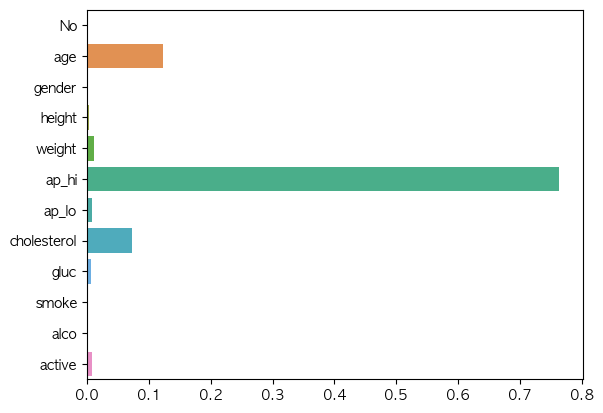

In [22]:
sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

In [23]:
# 데이터 분리

split_features = h_need_df.loc[:, ['age', 'ap_hi']]
split_targets = h_need_df.loc[:, 'cardio']
spl_X_train, spl_X_test, spl_y_train, spl_y_test = train_test_split(split_features, split_targets, test_size=0.2, stratify=split_targets, random_state=321)

spl_dtc = DecisionTreeClassifier()
spl_dtc.fit(X_train, y_train)


# 교차 검증 
from sklearn.model_selection import GridSearchCV
spl_parameters = {'max_depth': [5, 6, 7, 8, 9], 'min_samples_split': [2, 3, 4, 5, 6]}

spl_g_dtc = GridSearchCV(dtc, param_grid= spl_parameters, cv=5, refit=True, return_train_score=True)

# 교차 검증 진행
spl_g_dtc.fit(spl_X_train, spl_y_train)

pd.DataFrame(spl_g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]


# 교차 검증 이후 정확도 확인 
print(spl_g_dtc.best_params_, spl_g_dtc.best_score_, sep='\n')
spl_dtc = spl_g_dtc.best_estimator_
spl_prediction = spl_dtc.predict(spl_X_test)
spl_g_dtc.best_estimator_


# 분리한 feature에 대하여 다시 교차검증

{'max_depth': 6, 'min_samples_split': 3}
0.7214830898346003


DecisionTreeClassifier(max_depth=6, min_samples_split=3)

In [24]:
# 그래프 비즈를 통한 시각화
import graphviz
from sklearn.tree import export_graphviz


h_need_feature_names = h_need_df.loc[:, ['age', 'ap_hi']].columns
h_need_feature_names

export_graphviz(spl_dtc,
               out_file='./images/heart_gird_dtc02.dot',
               class_names = ['0','1'],
               feature_names= h_need_feature_names ,
               impurity = True,
               filled=True)

In [25]:
with open('./images/heart_gird_dtc02.dot') as f:
    heart_gird_dtc02 = f.read()

heart_gird_dtc02_graph = graphviz.Source(heart_gird_dtc02)

In [26]:
heart_gird_dtc02_graph.format = 'png'
heart_gird_dtc02_graph.render(filename='heart_gird_dtc02', directory ='./images', format='png', cleanup=False)

# 이전 확인했은 분리 하기 전 feature 와 분리 후 분석을 하였을 때 그래프의 모양이 유사하게 나타남

'images/heart_gird_dtc02.png'

<img src='./images/heart_grid_dtc01.png'>
<img src='./images/heart_gird_dtc02.png'>

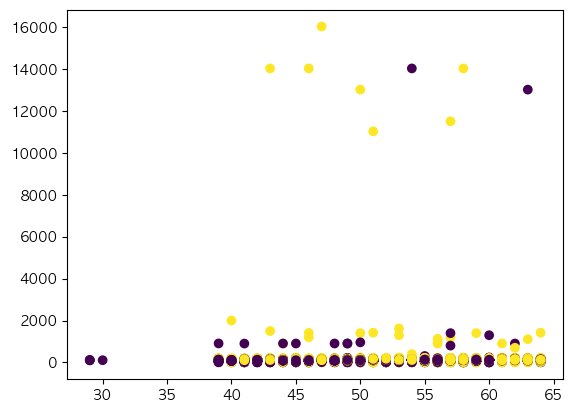

In [27]:
plt.scatter(split_features.iloc[:,0], split_features.iloc[:,1], c=split_targets)

In [28]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

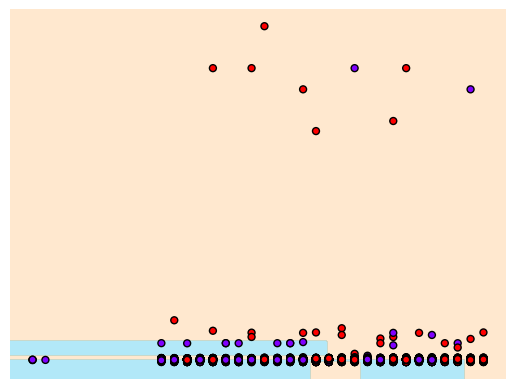

In [29]:
features_0_1 = split_features.iloc[:, [0, 1]]
visualize_boundary(spl_dtc, features_0_1, split_targets)
# 교차 검증 후 분석한 데이터를 기준으로 나이와 수축기 혈압, target 을 확인 했을 떄 결정 경계 부분 확인

## 별도의 중요 feature 가 아니라 전체 feature에 대하여 평가 진행

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[5565 1439]
 [2337 4658]]
정확도: 0.7303, 정밀도: 0.7640, 재현율: 0.6659, F1: 0.7116, ROC-AUC: 0.7302
################################################################################


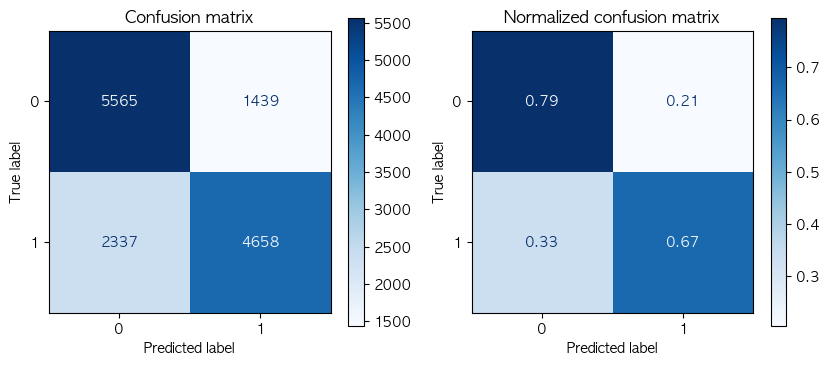

In [31]:
get_evaluation(y_test, prediction, dtc, X_test)
# 오차행렬을 통한 정밀도, 재현율, f1 score ROC Curve 의 수치값을 알았습니다.
# 질병에 대해서는 FP 의 경우 보다 FN의 risk 가 크기 때문에 FN의 경우를 낮춰야 합니다. 
# 따라서 재현율, 정밀도 확인 결과 재현율을 높이기 위해 임계치 값을 내려 f1 score 값을 올릴 수 있도록 진행하였습니다.

In [32]:
# 교차훈련까지 한 데이터에 대하여 predict_proba 에 대하여 검증 데이터 범주 반환
# predict() 메소드는 범주를 예측하여 반환하고,
# predict_praba() 메소드는 확률(probability)을 반환합니다.

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

for proba, predict in zip(proba.tolist(), prediction.tolist()):
    print(proba, predict)

[0.6123188405797102, 0.38768115942028986] 0
[0.12717359269083406, 0.8728264073091659] 1
[0.6123188405797102, 0.38768115942028986] 0
[0.766994266994267, 0.23300573300573302] 0
[0.4504950495049505, 0.5495049504950495] 1
[0.2519480519480519, 0.7480519480519481] 1
[0.7370758790869834, 0.26292412091301665] 0
[0.18566992014196984, 0.8143300798580302] 1
[0.15377969762419005, 0.8462203023758099] 1
[0.6123188405797102, 0.38768115942028986] 0
[0.6123188405797102, 0.38768115942028986] 0
[0.5433255269320844, 0.4566744730679157] 0
[0.17365269461077845, 0.8263473053892215] 1
[0.23633156966490299, 0.763668430335097] 1
[0.7370758790869834, 0.26292412091301665] 0
[0.7370758790869834, 0.26292412091301665] 0
[0.6475903614457831, 0.35240963855421686] 0
[0.8491599707815924, 0.15084002921840758] 0
[0.17365269461077845, 0.8263473053892215] 1
[0.15377969762419005, 0.8462203023758099] 1
[0.6123188405797102, 0.38768115942028986] 0
[0.31899641577060933, 0.6810035842293907] 1
[0.12717359269083406, 0.8728264073091

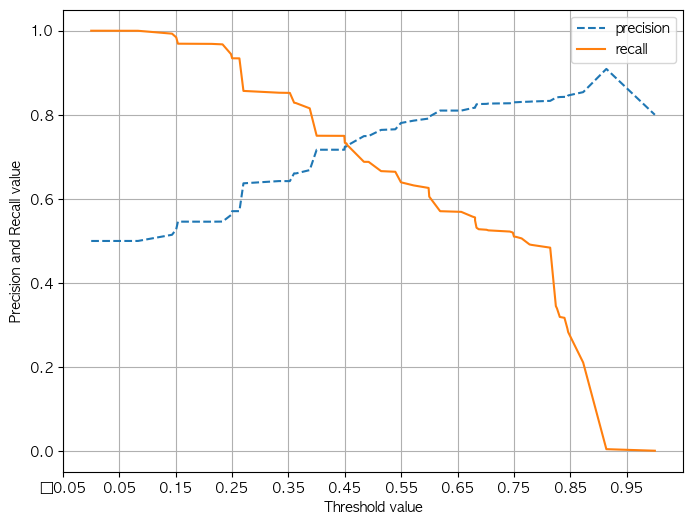

In [33]:
# thresholds 를 판단하기 위해 precision_recall_curve 을 사용
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test , proba):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

# thresholds 를 판단하기 위해 precision_recall_curve (정밀도 예측 커브를 사용하여 threshold의 값을 확인합니다.

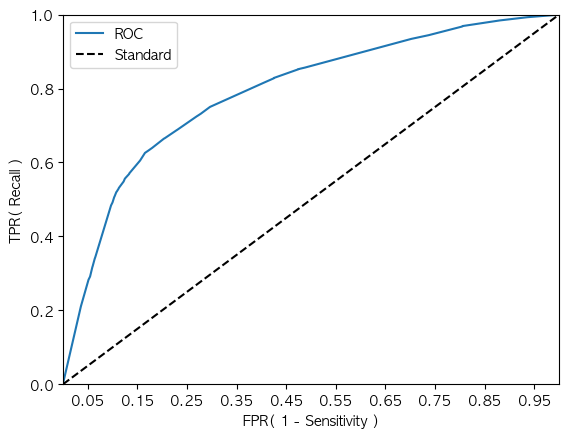

In [34]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))
# 현재 상태의 ROC Curve 곡선의 형태를 나타냅니다.

In [35]:
# threshold 수치 확인
proba_class1 = dtc.predict_proba(X_test)[:, 1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.        , 0.08303976, 0.14339019, 0.15084003, 0.15384615,
       0.21359223, 0.23300573, 0.24801412, 0.25      , 0.26292412,
       0.27010309, 0.33333333, 0.35240964, 0.36      , 0.36316337,
       0.38768116, 0.4       , 0.44897959, 0.45      , 0.45283019,
       0.45517241, 0.45667447, 0.48387097, 0.49221949, 0.51428571,
       0.53955809, 0.54950495, 0.57216495, 0.59859977, 0.59975743,
       0.61904762, 0.65650407, 0.67647059, 0.68100358, 0.68102288,
       0.68361582, 0.6875    , 0.7012987 , 0.70469799, 0.74285714,
       0.74805195, 0.75      , 0.75362319, 0.76366843, 0.77777778,
       0.78137652, 0.81433008, 0.82439024, 0.82634731, 0.8313253 ,
       0.83965728, 0.84482759, 0.8462203 , 0.87282641, 0.91397849,
       1.        ])

In [36]:
from sklearn.preprocessing import Binarizer

def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

In [37]:
# threshold 값에 따른 정밀도, 재현율 값 확인
get_evaluation_by_thresholds(y_test,proba_class1, thresholds)

0.0
오차 행렬
[[   3 7001]
 [   1 6994]]
정확도: 0.4998, 정밀도: 0.4997, 재현율: 0.9999, F1: 0.6664, ROC-AUC: 0.5001
################################################################################
0.08303975842979366
오차 행렬
[[ 448 6556]
 [  49 6946]]
정확도: 0.5282, 정밀도: 0.5144, 재현율: 0.9930, F1: 0.6778, ROC-AUC: 0.5285
################################################################################
0.1433901918976546
오차 행렬
[[ 837 6167]
 [ 110 6885]]
정확도: 0.5516, 정밀도: 0.5275, 재현율: 0.9843, F1: 0.6869, ROC-AUC: 0.5519
################################################################################
0.15084002921840758
오차 행렬
[[1360 5644]
 [ 216 6779]]
정확도: 0.5814, 정밀도: 0.5457, 재현율: 0.9691, F1: 0.6982, ROC-AUC: 0.5816
################################################################################
0.15384615384615385
오차 행렬
[[1360 5644]
 [ 219 6776]]
정확도: 0.5812, 정밀도: 0.5456, 재현율: 0.9687, F1: 0.6980, ROC-AUC: 0.5814
################################################################################
0.2135922330

In [38]:
# threshold 수치 값 변경 # 재현율 높이기 f1 올리기
# 재현율을 높이고 정밀도는 떨어지고 f1 스코어도 떨어짐
threshold = 0.35240963855421686

custom_proba = proba_class1
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)
# threshold 수치 값을 확인하여 재현율을 높였을 떄 정밀도는 떨어지지만 f1 score가 높아지며 roc-curve 곡선의 값도 0.7 이상인
# threshold 선택완료

오차 행렬
[[4025 2979]
 [1198 5797]]
정확도: 0.7016, 정밀도: 0.6606, 재현율: 0.8287, F1: 0.7351, ROC-AUC: 0.7017
################################################################################


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation_by_custom_proba(y_test, prediction, visualize=False):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if visualize:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_predictions(y_test, prediction, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[4025 2979]
 [1198 5797]]
정확도: 0.7016, 정밀도: 0.6606, 재현율: 0.8287, F1: 0.7351, ROC-AUC: 0.7017
################################################################################


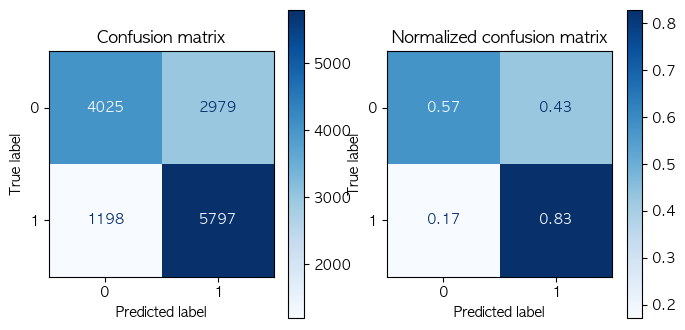

In [40]:
get_evaluation_by_custom_proba(y_test, custom_prediction, True)
# 임계치 변경 후 각각의 정확도, 정밀도, 재현율 f1 score, roc curve 값 확인

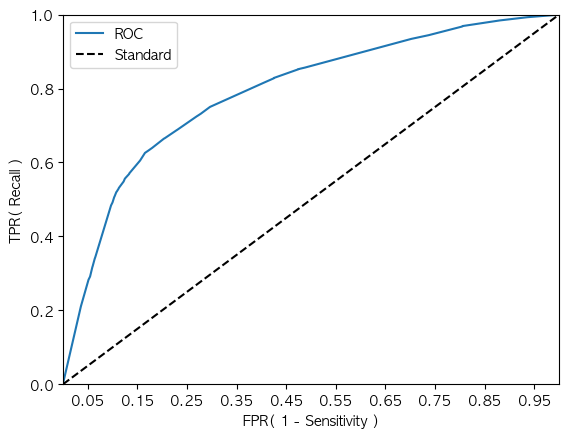

In [41]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , custom_proba):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, custom_proba)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))
# roc_curve 의 곡선의 형태도 변한 것을 확인 할 수 있습니다.

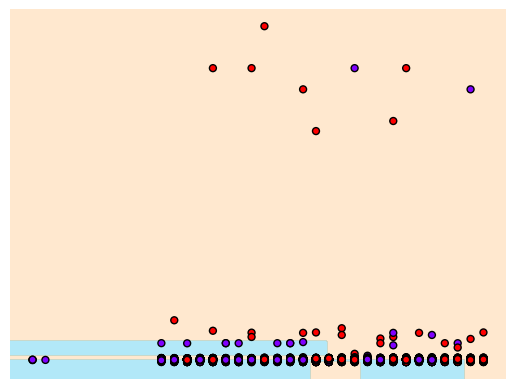

In [42]:
visualize_boundary(dtc, features_0_1, targets)
# 나이와 수축기 혈압에 대해서도 분석한 데이터로 다시 산점도를 표현했지만 육안상으로는 별도로 변경된 사항은 없는 것으로 확인 됩니다.

## 🏆오차행렬 (평가지표) 변화 히트맵


<div style="text-align: center;">
    <div style="display: inline-block; margin-right: 20px;">
        <p style="font-weight: bold; font-size:25px;">✅ Before</p>
        <img src="./images/hitmap1.png" width="700px">
    </div>
    <div style="display: inline-block;">
        <p style="font-weight: bold; font-size:25px;">✅ After</p>
        <img src="./images/hitmap2.png" width="700px">
    </div>
</div>


### f1 score가 올라가고 재현율이 높아지며 정밀도는 떨어진 평가 지표 확인 및 ROC Curve의 값도 0.7 이상으로 평가지표가 변한 부분 확인

## 🏆주요 feature에 대한 산점도 그래프 변화

<div style="text-align: center;">
    <div style="display: inline-block; margin-right: 20px;">
        <p style="font-weight: bold; font-size:25px;">✅ Before</p>
        <img src="./images/scatter1.png" width="500px">
    </div>
    <div style="display: inline-block;">
        <p style="font-weight: bold; font-size:25px;">✅ After</p>
        <img src="./images/scatter2.png" width="500px">
    </div>
</div>


## 🎈결론. 
### 결정트리의 과적합 정도의 변화는 육안상으로는 크기 변한 부분이 없어보이지만,
### 평가지표에 대한 표를 확인해 보았을 때 유의미한 수치값이 변한 것으로 확인 하였으며 FN 값이 실제로 떨어진 것을 확인할 수 있었습니다.
### 따라서 해당 모델이 심장질환의 위험도를 조금 더 뛰어나게 판단할 수 있을 것으로 판단됩니다.